In [347]:
import psycopg2
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
pd.options.display.max_rows = 85
pd.options.display.max_columns = 200

In [5]:
os.chdir("/Users/takeshisugiyama/Galvanize/capstone1/soccer-metrics/data/")

In [6]:
pwd

'/Users/takeshisugiyama/Galvanize/capstone1/soccer-metrics/data'

### Combine all csvs file to one

In [7]:
extension = 'csv'
all_filenames =[i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
df = pd.concat([pd.read_csv(f) for f in all_filenames])

### EDA

In [8]:
df.describe()

FTHG          FTAG          HTHG          HTAG            HS  \
count  14460.000000  14460.000000  14458.000000  14458.000000  14459.000000   
mean       1.576971      1.183817      0.699336      0.514317     14.142126   
std        1.323296      1.161888      0.846609      0.724264      5.288358   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000     10.000000   
50%        1.000000      1.000000      0.000000      0.000000     14.000000   
75%        2.000000      2.000000      1.000000      1.000000     17.000000   
max       10.000000      8.000000      6.000000      5.000000     43.000000   

                 AS           HST           AST            HF            AF  \
count  14459.000000  14459.000000  14459.000000  14459.000000  14459.000000   
mean      11.331420      5.311640      4.218065     13.481084     13.854969   
std        4.624149      2.889869      2.511799      4.561423      4.649321   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000      3.000000      2.000000     10.000000     10.000000   
50%       11.000000      5.000000      4.000000     13.000000     14.000000   
75%       14.000000      7.000000      6.000000     16.000000     17.000000   
max       39.000000     24.000000     20.000000     38.000000     34.000000   

                 HC            AC            HY            AY            HR  \
count  14459.000000  14459.000000  14458.000000  14459.000000  14459.000000   
mean       5.828688      4.565807      1.929451      2.218480      0.096134   
std        3.024713      2.615966      1.360671      1.408598      0.311220   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      3.000000      1.000000      1.000000      0.000000   
50%        5.000000      4.000000      2.000000      2.000000      0.000000   
75%        8.000000      6.000000      3.000000      3.000000      0.000000   
max       21.000000     19.000000      8.000000      9.000000      3.000000   

                 AR         B365H         B365D         B365A           BWH  \
count  14459.000000  14457.000000  14457.000000  14457.000000  14443.000000   
mean       0.128294      2.739257      4.032750      4.900198      2.681419   
std        0.360505      2.083734      1.405362      4.349966      1.933145   
min        0.000000      1.020000      1.400000      1.080000      1.030000   
25%        0.000000      1.660000      3.300000      2.500000      1.650000   
50%        0.000000      2.100000      3.500000      3.500000      2.100000   
75%        0.000000      2.890000      4.200000      5.500000      2.850000   
max        3.000000     26.000000     21.000000     51.000000     34.000000   

                BWD           BWA           IWH           IWD           IWA  \
count  14443.000000  14443.000000  14429.000000  14429.000000  14429.000000   
mean       3.971071      4.669802      2.594571      3.834299      4.405856   
std        1.320041      3.940544      1.732584      1.067639      3.495849   
min        1.650000      1.090000      1.030000      1.500000      1.100000   
25%        3.300000      2.500000      1.650000      3.300000      2.500000   
50%        3.500000      3.450000      2.100000      3.400000      3.300000   
75%        4.000000      5.250000      2.700000      3.900000      5.000000   
max       19.500000     51.000000     20.000000     16.000000     42.000000   

                LBH           LBD           LBA           PSH           PSD  \
count  13005.000000  13005.000000  13005.000000  10110.000000  10110.000000   
mean       2.645388      3.910048      4.706061      2.897128      4.308529   
std        1.892023      1.275674      4.190648      2.386505      1.783100   
min        1.040000      1.400000      1.060000      1.040000      2.200000   
25%        1.660000      3.300000      2.500000      1.68000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14466 entries, 0 to 305
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Div          14460 non-null  object 
 1   Date         14460 non-null  object 
 2   HomeTeam     14460 non-null  object 
 3   AwayTeam     14460 non-null  object 
 4   FTHG         14460 non-null  float64
 5   FTAG         14460 non-null  float64
 6   FTR          14460 non-null  object 
 7   HTHG         14458 non-null  float64
 8   HTAG         14458 non-null  float64
 9   HTR          14458 non-null  object 
 10  HS           14459 non-null  float64
 11  AS           14459 non-null  float64
 12  HST          14459 non-null  float64
 13  AST          14459 non-null  float64
 14  HF           14459 non-null  float64
 15  AF           14459 non-null  float64
 16  HC           14459 non-null  float64
 17  AC           14459 non-null  float64
 18  HY           14458 non-null  float64
 19  AY    

In [10]:
missing = df.isna()
missing_sum = missing.sum()
missing_sum

Div                6
Date               6
HomeTeam           6
AwayTeam           6
FTHG               6
FTAG               6
FTR                6
HTHG               8
HTAG               8
HTR                8
HS                 7
AS                 7
HST                7
AST                7
HF                 7
AF                 7
HC                 7
AC                 7
HY                 8
AY                 7
HR                 7
AR                 7
B365H              9
B365D              9
B365A              9
BWH               23
BWD               23
BWA               23
IWH               37
IWD               37
IWA               37
LBH             1461
LBD             1461
LBA             1461
PSH             4356
PSD             4356
PSA             4356
WHH               13
WHD               13
WHA               13
SJH             7134
SJD             7134
SJA             7134
VCH               27
VCD               27
VCA               27
Bb1X2              6
BbMxH        

In [11]:
missing.mean()*100

Div              0.041477
Date             0.041477
HomeTeam         0.041477
AwayTeam         0.041477
FTHG             0.041477
FTAG             0.041477
FTR              0.041477
HTHG             0.055302
HTAG             0.055302
HTR              0.055302
HS               0.048389
AS               0.048389
HST              0.048389
AST              0.048389
HF               0.048389
AF               0.048389
HC               0.048389
AC               0.048389
HY               0.055302
AY               0.048389
HR               0.048389
AR               0.048389
B365H            0.062215
B365D            0.062215
B365A            0.062215
BWH              0.158994
BWD              0.158994
BWA              0.158994
IWH              0.255772
IWD              0.255772
IWA              0.255772
LBH             10.099544
LBD             10.099544
LBA             10.099544
PSH             30.111987
PSD             30.111987
PSA             30.111987
WHH              0.089866
WHD         

In [12]:
mask = missing.mean()*100 <= 1

In [13]:
mask

Div             True
Date            True
HomeTeam        True
AwayTeam        True
FTHG            True
FTAG            True
FTR             True
HTHG            True
HTAG            True
HTR             True
HS              True
AS              True
HST             True
AST             True
HF              True
AF              True
HC              True
AC              True
HY              True
AY              True
HR              True
AR              True
B365H           True
B365D           True
B365A           True
BWH             True
BWD             True
BWA             True
IWH             True
IWD             True
IWA             True
LBH            False
LBD            False
LBA            False
PSH            False
PSD            False
PSA            False
WHH             True
WHD             True
WHA             True
SJH            False
SJD            False
SJA            False
VCH             True
VCD             True
VCA             True
Bb1X2           True
BbMxH        

### Filtering out rows that are all NaN

In [14]:
df = df[mask.index[mask]]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14466 entries, 0 to 305
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       14460 non-null  object 
 1   Date      14460 non-null  object 
 2   HomeTeam  14460 non-null  object 
 3   AwayTeam  14460 non-null  object 
 4   FTHG      14460 non-null  float64
 5   FTAG      14460 non-null  float64
 6   FTR       14460 non-null  object 
 7   HTHG      14458 non-null  float64
 8   HTAG      14458 non-null  float64
 9   HTR       14458 non-null  object 
 10  HS        14459 non-null  float64
 11  AS        14459 non-null  float64
 12  HST       14459 non-null  float64
 13  AST       14459 non-null  float64
 14  HF        14459 non-null  float64
 15  AF        14459 non-null  float64
 16  HC        14459 non-null  float64
 17  AC        14459 non-null  float64
 18  HY        14458 non-null  float64
 19  AY        14459 non-null  float64
 20  HR        14459 non-null  floa

In [34]:
df[df.isna().all(axis=1)].head(80)

Div Date HomeTeam AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  HS  AS  \
380  NaN  NaN      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN NaN NaN   
380  NaN  NaN      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN NaN NaN   
380  NaN  NaN      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN NaN NaN   
381  NaN  NaN      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN NaN NaN   
382  NaN  NaN      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN NaN NaN   
380  NaN  NaN      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN NaN NaN   

     HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A  BWH  BWD  \
380  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN    NaN  NaN  NaN   
380  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN    NaN  NaN  NaN   
380  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN    NaN  NaN  NaN   
381  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN    NaN  NaN  NaN   
382  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN    NaN  NaN  NaN   
380  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN    NaN  NaN  NaN   

     BWA  IWH  IWD  IWA  WHH  WHD  WHA  VCH  VCD  VCA  Bb1X2  BbMxH  BbAvH  \
380  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN   
380  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN   
380  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN   
381  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN   
382  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN   
380  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN   

     BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  \
380    NaN    NaN    NaN    NaN   NaN       NaN       NaN       NaN       NaN   
380    NaN    NaN    NaN    NaN   NaN       NaN       NaN       NaN       NaN   
380    NaN    NaN    NaN    NaN   NaN       NaN       NaN       NaN       NaN   
381    NaN    NaN    NaN    NaN   NaN       NaN       NaN       NaN       NaN   
382    NaN    NaN    NaN    NaN   NaN       NaN       NaN       NaN       NaN   
380    NaN    NaN    NaN    NaN   NaN       NaN       NaN       NaN       NaN   

     BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  
380   NaN    NaN      NaN      NaN      NaN      NaN  
380   NaN    NaN      NaN      NaN      NaN      NaN  
380   NaN    NaN      NaN      NaN      NaN      NaN  
381   NaN    NaN      NaN      NaN      NaN      NaN  
382   NaN    NaN      NaN      NaN      NaN      NaN  
380   NaN    NaN      NaN      NaN      NaN      NaN

In [32]:
df[df.isna().any(axis=1)].head(80)

Div      Date       HomeTeam       AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
218   I1  09/02/15          Lazio          Genoa   0.0   1.0    A   0.0   1.0   
247   I1  02/03/15           Roma       Juventus   1.0   1.0    D   0.0   0.0   
253   I1  08/03/15         Napoli          Inter   2.0   2.0    D   0.0   0.0   
254   I1  08/03/15          Parma       Atalanta   0.0   0.0    D   0.0   0.0   
275   I1  22/03/15          Parma         Torino   0.0   2.0    A   0.0   1.0   
358   I1  18/05/15     Fiorentina          Parma   3.0   0.0    H   2.0   0.0   
380  NaN       NaN            NaN            NaN   NaN   NaN  NaN   NaN   NaN   
271   I1  05/03/16         Napoli         Chievo   3.0   1.0    H   2.0   1.0   
380  NaN       NaN            NaN            NaN   NaN   NaN  NaN   NaN   NaN   
17    I1  28/08/16       Sassuolo        Pescara   0.0   3.0    A   NaN   NaN   
373   I1  28/05/17        Crotone          Lazio   3.0   1.0    H   2.0   1.0   
34    I1  23/09/12       Cagliari           Roma   0.0   3.0    A   NaN   NaN   
355   I1  08/05/13        Palermo        Udinese   2.0   3.0    A   1.0   1.0   
359   I1  08/05/13         Torino          Genoa   0.0   0.0    D   0.0   0.0   
360   I1  11/05/13        Catania        Pescara   1.0   0.0    H   0.0   0.0   
362   I1  12/05/13         Chievo         Torino   1.0   1.0    D   1.0   1.0   
363   I1  12/05/13     Fiorentina        Palermo   1.0   0.0    H   1.0   0.0   
368   I1  12/05/13          Parma        Bologna   0.0   2.0    A   0.0   1.0   
375   I1  19/05/13        Palermo          Parma   1.0   3.0    A   0.0   3.0   
380  NaN       NaN            NaN            NaN   NaN   NaN  NaN   NaN   NaN   
381  NaN       NaN            NaN            NaN   NaN   NaN  NaN   NaN   NaN   
382  NaN       NaN            NaN            NaN   NaN   NaN  NaN   NaN   NaN   
206   I1  05/02/12         Chievo          Parma   1.0   2.0    A   0.0   0.0   
212   I1  05/02/12         Novara       Cagliari   0.0   0.0    D   0.0   0.0   
286   I1  21/03/10         Chievo        Catania   1.0   1.0    D   0.0   0.0   
299   I1  25/03/10         Napoli       Juventus   3.0   1.0    H   0.0   1.0   
302   I1  28/03/10         Chievo          Parma   0.0   0.0    D   0.0   0.0   
304   I1  28/03/10       Juventus       Atalanta   2.0   1.0    H   1.0   1.0   
313   I1  03/04/10        Catania        Palermo   2.0   0.0    H   2.0   0.0   
321   I1  10/04/10         Napoli          Parma   2.0   3.0    A   1.0   0.0   
322   I1  11/04/10        Bologna          Lazio   2.0   3.0    A   2.0   1.0   
331   I1  17/04/10         Chievo        Livorno   2.0   0.0    H   1.0   0.0   
339   I1  18/04/10        Udinese        Bologna   1.0   1.0    D   0.0   1.0   
342   I1  25/04/10        Bologna          Parma   2.0   1.0    H   1.0   1.0   
353   I1  02/05/10           Bari          Genoa   3.0   0.0    H   0.0   0.0   
354   I1  02/05/10       Cagliari        Udinese   2.0   2.0    D   1.0   2.0   
360   I1  09/05/10        Bologna        Catania   1.0   1.0    D   1.0   0.0   
374   I1  16/05/10       Cagliari        Bologna   1.0   1.0    D   0.0   1.0   
375   I1  16/05/10        Catania          Genoa   1.0   0.0    H   0.0   0.0   
112   I1  14/11/10           Bari          Parma   0.0   1.0    A   0.0   1.0   
118   I1  14/11/10      Sampdoria         Chievo   0.0   0.0    D   0.0   0.0   
304   I1  03/04/11         Chievo      Sampdoria   0.0   0.0    D   0.0   0.0   
305   I1  03/04/11          Genoa       Cagliari   0.0   1.0    A   0.0   1.0   
314   I1  10/04/11       Cagliari        Brescia   1.0   1.0    D   1.0   0.0   
318   I1  10/04/11        Palermo         Cesena   2.0   2.0    D   2.0   0.0   
319   I1  10/04/11      Sampdoria          Lecce   1.0   2.0    A   0.0   1.0   
325   I1  17/04/11         Chievo        Bologna   2.0   0.0    H   1.0   0.0   
327   I1  17/04/11          Genoa        Brescia   3.0   0.0    H   0.0   0.0   
344   I1  01/05/11         Chievo   

In [36]:
df = df[df['Div'].notna()]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14460 entries, 0 to 305
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       14460 non-null  object 
 1   Date      14460 non-null  object 
 2   HomeTeam  14460 non-null  object 
 3   AwayTeam  14460 non-null  object 
 4   FTHG      14460 non-null  float64
 5   FTAG      14460 non-null  float64
 6   FTR       14460 non-null  object 
 7   HTHG      14458 non-null  float64
 8   HTAG      14458 non-null  float64
 9   HTR       14458 non-null  object 
 10  HS        14459 non-null  float64
 11  AS        14459 non-null  float64
 12  HST       14459 non-null  float64
 13  AST       14459 non-null  float64
 14  HF        14459 non-null  float64
 15  AF        14459 non-null  float64
 16  HC        14459 non-null  float64
 17  AC        14459 non-null  float64
 18  HY        14458 non-null  float64
 19  AY        14459 non-null  float64
 20  HR        14459 non-null  floa

In [38]:
df[df.isna().any(axis=1)].head(80)

Div      Date       HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
218   I1  09/02/15          Lazio          Genoa   0.0   1.0   A   0.0   1.0   
247   I1  02/03/15           Roma       Juventus   1.0   1.0   D   0.0   0.0   
253   I1  08/03/15         Napoli          Inter   2.0   2.0   D   0.0   0.0   
254   I1  08/03/15          Parma       Atalanta   0.0   0.0   D   0.0   0.0   
275   I1  22/03/15          Parma         Torino   0.0   2.0   A   0.0   1.0   
358   I1  18/05/15     Fiorentina          Parma   3.0   0.0   H   2.0   0.0   
271   I1  05/03/16         Napoli         Chievo   3.0   1.0   H   2.0   1.0   
17    I1  28/08/16       Sassuolo        Pescara   0.0   3.0   A   NaN   NaN   
373   I1  28/05/17        Crotone          Lazio   3.0   1.0   H   2.0   1.0   
34    I1  23/09/12       Cagliari           Roma   0.0   3.0   A   NaN   NaN   
355   I1  08/05/13        Palermo        Udinese   2.0   3.0   A   1.0   1.0   
359   I1  08/05/13         Torino          Genoa   0.0   0.0   D   0.0   0.0   
360   I1  11/05/13        Catania        Pescara   1.0   0.0   H   0.0   0.0   
362   I1  12/05/13         Chievo         Torino   1.0   1.0   D   1.0   1.0   
363   I1  12/05/13     Fiorentina        Palermo   1.0   0.0   H   1.0   0.0   
368   I1  12/05/13          Parma        Bologna   0.0   2.0   A   0.0   1.0   
375   I1  19/05/13        Palermo          Parma   1.0   3.0   A   0.0   3.0   
206   I1  05/02/12         Chievo          Parma   1.0   2.0   A   0.0   0.0   
212   I1  05/02/12         Novara       Cagliari   0.0   0.0   D   0.0   0.0   
286   I1  21/03/10         Chievo        Catania   1.0   1.0   D   0.0   0.0   
299   I1  25/03/10         Napoli       Juventus   3.0   1.0   H   0.0   1.0   
302   I1  28/03/10         Chievo          Parma   0.0   0.0   D   0.0   0.0   
304   I1  28/03/10       Juventus       Atalanta   2.0   1.0   H   1.0   1.0   
313   I1  03/04/10        Catania        Palermo   2.0   0.0   H   2.0   0.0   
321   I1  10/04/10         Napoli          Parma   2.0   3.0   A   1.0   0.0   
322   I1  11/04/10        Bologna          Lazio   2.0   3.0   A   2.0   1.0   
331   I1  17/04/10         Chievo        Livorno   2.0   0.0   H   1.0   0.0   
339   I1  18/04/10        Udinese        Bologna   1.0   1.0   D   0.0   1.0   
342   I1  25/04/10        Bologna          Parma   2.0   1.0   H   1.0   1.0   
353   I1  02/05/10           Bari          Genoa   3.0   0.0   H   0.0   0.0   
354   I1  02/05/10       Cagliari        Udinese   2.0   2.0   D   1.0   2.0   
360   I1  09/05/10        Bologna        Catania   1.0   1.0   D   1.0   0.0   
374   I1  16/05/10       Cagliari        Bologna   1.0   1.0   D   0.0   1.0   
375   I1  16/05/10        Catania          Genoa   1.0   0.0   H   0.0   0.0   
112   I1  14/11/10           Bari          Parma   0.0   1.0   A   0.0   1.0   
118   I1  14/11/10      Sampdoria         Chievo   0.0   0.0   D   0.0   0.0   
304   I1  03/04/11         Chievo      Sampdoria   0.0   0.0   D   0.0   0.0   
305   I1  03/04/11          Genoa       Cagliari   0.0   1.0   A   0.0   1.0   
314   I1  10/04/11       Cagliari        Brescia   1.0   1.0   D   1.0   0.0   
318   I1  10/04/11        Palermo         Cesena   2.0   2.0   D   2.0   0.0   
319   I1  10/04/11      Sampdoria          Lecce   1.0   2.0   A   0.0   1.0   
325   I1  17/04/11         Chievo        Bologna   2.0   0.0   H   1.0   0.0   
327   I1  17/04/11          Genoa        Brescia   3.0   0.0   H   0.0   0.0   
344   I1  01/05/11         Chievo          Lecce   1.0   0.0   H   0.0   0.0   
352   I1  08/05/11        Bologna          Parma   0.0   0.0   D   0.0   0.0   
354   I1  08/05/11       Cagliari         Cesena   0.0   2.0   A   0.0   0.0   
364   I1  15/05/11         Cesena        Brescia   1.0   0.0   H   0.0   0.0   
367   I1  15/05/11         Napoli          Inter   1.0   1.0   D   1.0   1.0   
378   I1  22/05/11           Roma      Sampdoria   3.0   1.0   H   1.0   1.0   
379  

In [70]:
# Separating dataset from Stats
dfs = df.iloc[:, 0:22].reset_index(drop=True)
dfs

Div      Date    HomeTeam            AwayTeam  FTHG  FTAG FTR  HTHG  \
0      I1  30/08/14      Chievo            Juventus   0.0   1.0   A   0.0   
1      I1  30/08/14        Roma          Fiorentina   2.0   0.0   H   1.0   
2      I1  31/08/14    Atalanta              Verona   0.0   0.0   D   0.0   
3      I1  31/08/14      Cesena               Parma   1.0   0.0   H   1.0   
4      I1  31/08/14       Genoa              Napoli   1.0   2.0   A   1.0   
...    ..       ...         ...                 ...   ...   ...  ..   ...   
14455  D1  18/05/13     Hamburg          Leverkusen   0.0   1.0   A   0.0   
14456  D1  18/05/13    Hannover  Fortuna Dusseldorf   3.0   0.0   H   1.0   
14457  D1  18/05/13  M'gladbach       Bayern Munich   3.0   4.0   A   3.0   
14458  D1  18/05/13    Nurnberg       Werder Bremen   3.0   2.0   H   0.0   
14459  D1  18/05/13   Stuttgart               Mainz   2.0   2.0   D   2.0   

       HTAG HTR    HS    AS  HST   AST    HF    AF   HC    AC   HY   AY   HR  \
0       1.0   A   7.0  21.0  2.0   3.0  13.0  14.0  4.0  11.0  2.0  1.0  0.0   
1       0.0   H  20.0  10.0  5.0   4.0  15.0  17.0  2.0   0.0  4.0  4.0  0.0   
2       0.0   D  11.0   9.0  1.0   3.0  17.0  16.0  6.0   2.0  2.0  3.0  0.0   
3       0.0   H   9.0  12.0  5.0   1.0  10.0  19.0  4.0   7.0  2.0  1.0  0.0   
4       1.0   D  11.0  15.0  5.0   5.0  10.0  10.0  7.0   5.0  3.0  1.0  0.0   
...     ...  ..   ...   ...  ...   ...   ...   ...  ...   ...  ...  ...  ...   
14455   0.0   D  13.0  15.0  1.0   7.0  17.0  13.0  2.0   6.0  4.0  2.0  0.0   
14456   0.0   H  15.0  13.0  6.0   2.0  15.0  14.0  7.0   4.0  1.0  3.0  0.0   
14457   2.0   H  11.0  26.0  5.0  13.0   7.0   7.0  1.0  10.0  0.0  0.0  0.0   
14458   1.0   A  16.0  18.0  5.0   4.0  16.0  12.0  3.0   2.0  2.0  0.0  0.0   
14459   2.0   D  10.0  15.0  3.0   3.0  17.0  13.0  5.0   5.0  2.0  0.0  0.0   

        AR  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
14455  0.0  
14456  0.0  
14457  0.0  
14458  0.0  
14459  0.0  

[14460 rows x 22 columns]

In [71]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       14460 non-null  object 
 1   Date      14460 non-null  object 
 2   HomeTeam  14460 non-null  object 
 3   AwayTeam  14460 non-null  object 
 4   FTHG      14460 non-null  float64
 5   FTAG      14460 non-null  float64
 6   FTR       14460 non-null  object 
 7   HTHG      14458 non-null  float64
 8   HTAG      14458 non-null  float64
 9   HTR       14458 non-null  object 
 10  HS        14459 non-null  float64
 11  AS        14459 non-null  float64
 12  HST       14459 non-null  float64
 13  AST       14459 non-null  float64
 14  HF        14459 non-null  float64
 15  AF        14459 non-null  float64
 16  HC        14459 non-null  float64
 17  AC        14459 non-null  float64
 18  HY        14458 non-null  float64
 19  AY        14459 non-null  float64
 20  HR        14459 non-null  fl

### Games that were dropped.

In [72]:
dfs[dfs.isna().any(axis=1)]

Div      Date  HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  HTR    HS  \
247   I1  02/03/15      Roma  Juventus   1.0   1.0   D   0.0   0.0    D   8.0   
1917  I1  28/08/16  Sassuolo   Pescara   0.0   3.0   A   NaN   NaN  NaN  13.0   
2314  I1  23/09/12  Cagliari      Roma   0.0   3.0   A   NaN   NaN  NaN   NaN   

        AS  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  
247   10.0  3.0  1.0  11.0  16.0  1.0  5.0  NaN  5.0  1.0  0.0  
1917  15.0  3.0  5.0  12.0  21.0  2.0  7.0  2.0  2.0  0.0  0.0  
2314   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [73]:
dfs = dfs.dropna().reset_index(drop=True)
dfs

Div      Date    HomeTeam            AwayTeam  FTHG  FTAG FTR  HTHG  \
0      I1  30/08/14      Chievo            Juventus   0.0   1.0   A   0.0   
1      I1  30/08/14        Roma          Fiorentina   2.0   0.0   H   1.0   
2      I1  31/08/14    Atalanta              Verona   0.0   0.0   D   0.0   
3      I1  31/08/14      Cesena               Parma   1.0   0.0   H   1.0   
4      I1  31/08/14       Genoa              Napoli   1.0   2.0   A   1.0   
...    ..       ...         ...                 ...   ...   ...  ..   ...   
14452  D1  18/05/13     Hamburg          Leverkusen   0.0   1.0   A   0.0   
14453  D1  18/05/13    Hannover  Fortuna Dusseldorf   3.0   0.0   H   1.0   
14454  D1  18/05/13  M'gladbach       Bayern Munich   3.0   4.0   A   3.0   
14455  D1  18/05/13    Nurnberg       Werder Bremen   3.0   2.0   H   0.0   
14456  D1  18/05/13   Stuttgart               Mainz   2.0   2.0   D   2.0   

       HTAG HTR    HS    AS  HST   AST    HF    AF   HC    AC   HY   AY   HR  \
0       1.0   A   7.0  21.0  2.0   3.0  13.0  14.0  4.0  11.0  2.0  1.0  0.0   
1       0.0   H  20.0  10.0  5.0   4.0  15.0  17.0  2.0   0.0  4.0  4.0  0.0   
2       0.0   D  11.0   9.0  1.0   3.0  17.0  16.0  6.0   2.0  2.0  3.0  0.0   
3       0.0   H   9.0  12.0  5.0   1.0  10.0  19.0  4.0   7.0  2.0  1.0  0.0   
4       1.0   D  11.0  15.0  5.0   5.0  10.0  10.0  7.0   5.0  3.0  1.0  0.0   
...     ...  ..   ...   ...  ...   ...   ...   ...  ...   ...  ...  ...  ...   
14452   0.0   D  13.0  15.0  1.0   7.0  17.0  13.0  2.0   6.0  4.0  2.0  0.0   
14453   0.0   H  15.0  13.0  6.0   2.0  15.0  14.0  7.0   4.0  1.0  3.0  0.0   
14454   2.0   H  11.0  26.0  5.0  13.0   7.0   7.0  1.0  10.0  0.0  0.0  0.0   
14455   1.0   A  16.0  18.0  5.0   4.0  16.0  12.0  3.0   2.0  2.0  0.0  0.0   
14456   2.0   D  10.0  15.0  3.0   3.0  17.0  13.0  5.0   5.0  2.0  0.0  0.0   

        AR  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
14452  0.0  
14453  0.0  
14454  0.0  
14455  0.0  
14456  0.0  

[14457 rows x 22 columns]

### Changed date format to US

In [77]:
dfs['Date'] = pd.to_datetime(dfs['Date'], dayfirst=True)

In [76]:
dfs = dfs.sort_values(by=['Div', 'Date']).reset_index(drop=True)
dfs

Div       Date     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0       D1 2009-08-07    Wolfsburg      Stuttgart   2.0   0.0   H   0.0   0.0   
1       D1 2009-08-08     Dortmund        FC Koln   1.0   0.0   H   0.0   0.0   
2       D1 2009-08-08       Hertha       Hannover   1.0   0.0   H   0.0   0.0   
3       D1 2009-08-08   Hoffenheim  Bayern Munich   1.0   1.0   D   1.0   1.0   
4       D1 2009-08-08        Mainz     Leverkusen   2.0   2.0   D   1.0   2.0   
...    ...        ...          ...            ...   ...   ...  ..   ...   ...   
14452  SP1 2019-05-18      Levante     Ath Madrid   2.0   2.0   D   2.0   0.0   
14453  SP1 2019-05-18      Sevilla     Ath Bilbao   2.0   0.0   H   1.0   0.0   
14454  SP1 2019-05-18   Valladolid       Valencia   0.0   2.0   A   0.0   1.0   
14455  SP1 2019-05-19        Eibar      Barcelona   2.0   2.0   D   2.0   2.0   
14456  SP1 2019-05-19  Real Madrid          Betis   0.0   2.0   A   0.0   0.0   

      HTR    HS    AS   HST  AST    HF    AF    HC    AC   HY   AY   HR   AR  
0       D  13.0  14.0   7.0  4.0  12.0  12.0   6.0   3.0  0.0  0.0  0.0  0.0  
1       D  24.0   7.0  11.0  0.0   8.0  10.0  16.0   1.0  0.0  1.0  0.0  0.0  
2       D  10.0  15.0   4.0  3.0  16.0  20.0   5.0   3.0  3.0  2.0  0.0  0.0  
3       D   9.0   9.0   1.0  3.0  10.0  28.0   3.0  10.0  0.0  2.0  0.0  0.0  
4       A   8.0  13.0   4.0  7.0  22.0  28.0   3.0   5.0  1.0  2.0  0.0  0.0  
...    ..   ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  
14452   H  17.0  17.0   7.0  8.0   9.0   7.0   6.0   4.0  0.0  1.0  0.0  1.0  
14453   H   9.0   9.0   3.0  1.0  14.0  19.0   2.0   3.0  4.0  2.0  0.0  0.0  
14454   A  19.0   9.0   4.0  6.0  12.0  10.0   8.0   2.0  1.0  3.0  0.0  0.0  
14455   D  15.0   6.0   8.0  3.0  11.0   3.0   5.0   2.0  4.0  2.0  0.0  0.0  
14456   D   9.0   9.0   2.0  7.0  17.0  11.0   1.0   5.0  4.0  1.0  0.0  0.0  

[14457 rows x 22 columns]

In [110]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14457 entries, 0 to 14456
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       14457 non-null  object        
 1   Date      14457 non-null  datetime64[ns]
 2   HomeTeam  14457 non-null  object        
 3   AwayTeam  14457 non-null  object        
 4   FTHG      14457 non-null  float64       
 5   FTAG      14457 non-null  float64       
 6   FTR       14457 non-null  object        
 7   HTHG      14457 non-null  float64       
 8   HTAG      14457 non-null  float64       
 9   HTR       14457 non-null  object        
 10  HS        14457 non-null  float64       
 11  AS        14457 non-null  float64       
 12  HST       14457 non-null  float64       
 13  AST       14457 non-null  float64       
 14  HF        14457 non-null  float64       
 15  AF        14457 non-null  float64       
 16  HC        14457 non-null  float64       
 17  AC        14

### Creating dummy variables for Fulltime and Halftime Results

In [117]:
dfs_cleaned = pd.get_dummies(dfs, columns=['FTR', 'HTR'])
dfs_cleaned

Div       Date     HomeTeam       AwayTeam  FTHG  FTAG  HTHG  HTAG  \
0       D1 2009-08-07    Wolfsburg      Stuttgart   2.0   0.0   0.0   0.0   
1       D1 2009-08-08     Dortmund        FC Koln   1.0   0.0   0.0   0.0   
2       D1 2009-08-08       Hertha       Hannover   1.0   0.0   0.0   0.0   
3       D1 2009-08-08   Hoffenheim  Bayern Munich   1.0   1.0   1.0   1.0   
4       D1 2009-08-08        Mainz     Leverkusen   2.0   2.0   1.0   2.0   
...    ...        ...          ...            ...   ...   ...   ...   ...   
14452  SP1 2019-05-18      Levante     Ath Madrid   2.0   2.0   2.0   0.0   
14453  SP1 2019-05-18      Sevilla     Ath Bilbao   2.0   0.0   1.0   0.0   
14454  SP1 2019-05-18   Valladolid       Valencia   0.0   2.0   0.0   1.0   
14455  SP1 2019-05-19        Eibar      Barcelona   2.0   2.0   2.0   2.0   
14456  SP1 2019-05-19  Real Madrid          Betis   0.0   2.0   0.0   0.0   

         HS    AS   HST  AST    HF    AF    HC    AC   HY   AY   HR   AR  \
0      13.0  14.0   7.0  4.0  12.0  12.0   6.0   3.0  0.0  0.0  0.0  0.0   
1      24.0   7.0  11.0  0.0   8.0  10.0  16.0   1.0  0.0  1.0  0.0  0.0   
2      10.0  15.0   4.0  3.0  16.0  20.0   5.0   3.0  3.0  2.0  0.0  0.0   
3       9.0   9.0   1.0  3.0  10.0  28.0   3.0  10.0  0.0  2.0  0.0  0.0   
4       8.0  13.0   4.0  7.0  22.0  28.0   3.0   5.0  1.0  2.0  0.0  0.0   
...     ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...   
14452  17.0  17.0   7.0  8.0   9.0   7.0   6.0   4.0  0.0  1.0  0.0  1.0   
14453   9.0   9.0   3.0  1.0  14.0  19.0   2.0   3.0  4.0  2.0  0.0  0.0   
14454  19.0   9.0   4.0  6.0  12.0  10.0   8.0   2.0  1.0  3.0  0.0  0.0   
14455  15.0   6.0   8.0  3.0  11.0   3.0   5.0   2.0  4.0  2.0  0.0  0.0   
14456   9.0   9.0   2.0  7.0  17.0  11.0   1.0   5.0  4.0  1.0  0.0  0.0   

       FTR_A  FTR_D  FTR_H  HTR_A  HTR_D  HTR_H  
0          0      0      1      0      1      0  
1          0      0      1      0      1      0  
2          0      0      1      0      1      0  
3          0      1      0      0      1      0  
4          0      1      0      1      0      0  
...      ...    ...    ...    ...    ...    ...  
14452      0      1      0      0      0      1  
14453      0      0      1      0      0      1  
14454      1      0      0      1      0      0  
14455      0      1      0      0      1      0  
14456      1      0      0      0      1      0  

[14457 rows x 26 columns]

### Changing order of list

In [180]:
cols = dfs_cleaned.columns.tolist()
cols

['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'FTR_A',
 'FTR_D',
 'FTR_H',
 'HTR_A',
 'HTR_D',
 'HTR_H']

In [133]:
cols = ['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG', 
 'FTR_H',
 'FTR_D',
 'FTR_A',
 'HTR_H',
 'HTR_D',
 'HTR_A',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [134]:
dfs = dfs_cleaned[cols]
dfs

Div       Date     HomeTeam       AwayTeam  FTHG  FTAG  HTHG  HTAG  \
0       D1 2009-08-07    Wolfsburg      Stuttgart   2.0   0.0   0.0   0.0   
1       D1 2009-08-08     Dortmund        FC Koln   1.0   0.0   0.0   0.0   
2       D1 2009-08-08       Hertha       Hannover   1.0   0.0   0.0   0.0   
3       D1 2009-08-08   Hoffenheim  Bayern Munich   1.0   1.0   1.0   1.0   
4       D1 2009-08-08        Mainz     Leverkusen   2.0   2.0   1.0   2.0   
...    ...        ...          ...            ...   ...   ...   ...   ...   
14452  SP1 2019-05-18      Levante     Ath Madrid   2.0   2.0   2.0   0.0   
14453  SP1 2019-05-18      Sevilla     Ath Bilbao   2.0   0.0   1.0   0.0   
14454  SP1 2019-05-18   Valladolid       Valencia   0.0   2.0   0.0   1.0   
14455  SP1 2019-05-19        Eibar      Barcelona   2.0   2.0   2.0   2.0   
14456  SP1 2019-05-19  Real Madrid          Betis   0.0   2.0   0.0   0.0   

       FTR_H  FTR_D  FTR_A  HTR_H  HTR_D  HTR_A    HS    AS   HST  AST    HF  \
0          1      0      0      0      1      0  13.0  14.0   7.0  4.0  12.0   
1          1      0      0      0      1      0  24.0   7.0  11.0  0.0   8.0   
2          1      0      0      0      1      0  10.0  15.0   4.0  3.0  16.0   
3          0      1      0      0      1      0   9.0   9.0   1.0  3.0  10.0   
4          0      1      0      0      0      1   8.0  13.0   4.0  7.0  22.0   
...      ...    ...    ...    ...    ...    ...   ...   ...   ...  ...   ...   
14452      0      1      0      1      0      0  17.0  17.0   7.0  8.0   9.0   
14453      1      0      0      1      0      0   9.0   9.0   3.0  1.0  14.0   
14454      0      0      1      0      0      1  19.0   9.0   4.0  6.0  12.0   
14455      0      1      0      0      1      0  15.0   6.0   8.0  3.0  11.0   
14456      0      0      1      0      1      0   9.0   9.0   2.0  7.0  17.0   

         AF    HC    AC   HY   AY   HR   AR  
0      12.0   6.0   3.0  0.0  0.0  0.0  0.0  
1      10.0  16.0   1.0  0.0  1.0  0.0  0.0  
2      20.0   5.0   3.0  3.0  2.0  0.0  0.0  
3      28.0   3.0  10.0  0.0  2.0  0.0  0.0  
4      28.0   3.0   5.0  1.0  2.0  0.0  0.0  
...     ...   ...   ...  ...  ...  ...  ...  
14452   7.0   6.0   4.0  0.0  1.0  0.0  1.0  
14453  19.0   2.0   3.0  4.0  2.0  0.0  0.0  
14454  10.0   8.0   2.0  1.0  3.0  0.0  0.0  
14455   3.0   5.0   2.0  4.0  2.0  0.0  0.0  
14456  11.0   1.0   5.0  4.0  1.0  0.0  0.0  

[14457 rows x 26 columns]

### Subsetting dataset to each league

In [508]:
dl = dfs[dfs.Div == 'D1'].reset_index(drop=True)
sl = dfs[dfs.Div == 'SP1'].reset_index(drop=True)
el = dfs[dfs.Div == 'E0'].reset_index(drop=True)
il = dfs[dfs.Div == 'I1'].reset_index(drop=True)

### Subsetting dataset to each year

In [531]:
dfs09 = dfs[(dfs['Date'] > '2009/7/1') & (dfs['Date'] <= '2010/6/30')].reset_index(drop=True)
dfs10 = dfs[(dfs['Date'] > '2010/7/1') & (dfs['Date'] <= '2011/6/30')].reset_index(drop=True)
dfs12 = dfs[(dfs['Date'] > '2011/7/1') & (dfs['Date'] <= '2012/6/30')].reset_index(drop=True)
dfs13 = dfs[(dfs['Date'] > '2012/7/1') & (dfs['Date'] <= '2013/6/30')].reset_index(drop=True)
dfs14 = dfs[(dfs['Date'] > '2013/7/1') & (dfs['Date'] <= '2014/6/30')].reset_index(drop=True)
dfs15 = dfs[(dfs['Date'] > '2014/7/1') & (dfs['Date'] <= '2015/6/30')].reset_index(drop=True)
dfs16 = dfs[(dfs['Date'] > '2015/7/1') & (dfs['Date'] <= '2016/6/30')].reset_index(drop=True)
dfs17 = dfs[(dfs['Date'] > '2016/7/1') & (dfs['Date'] <= '2017/6/30')].reset_index(drop=True)
dfs18 = dfs[(dfs['Date'] > '2017/7/1') & (dfs['Date'] <= '2018/6/30')].reset_index(drop=True)
dfs19 = dfs[(dfs['Date'] > '2018/7/1') & (dfs['Date'] <= '2019/6/30')].reset_index(drop=True)

#Subsetting from 2009~2018 season
dfs0918 = dfs[(dfs['Date'] > '2009/7/1') & (dfs['Date'] <= '2018/6/30')].reset_index(drop=True)

### Checking if win percentage at Home are increasing over the last year

In [524]:
test1 = dfs0918.groupby('HomeTeam').mean()
test1.sort_values('FTR_H', ascending=False).head(10)

FTHG      FTAG      HTHG      HTAG     FTR_H     FTR_D  \
HomeTeam                                                                    
Barcelona      3.222222  0.672515  1.479532  0.286550  0.865497  0.087719   
Real Madrid    3.263158  0.923977  1.479532  0.450292  0.824561  0.099415   
Bayern Munich  2.928105  0.633987  1.346405  0.320261  0.810458  0.117647   
Juventus       2.134503  0.713450  1.029240  0.257310  0.754386  0.152047   
Man City       2.473684  0.807018  1.029240  0.315789  0.742690  0.157895   
Man United     2.099415  0.748538  0.959064  0.263158  0.719298  0.152047   
Chelsea        2.251462  0.877193  1.064327  0.368421  0.690058  0.187135   
Ath Madrid     2.011696  0.719298  0.883041  0.280702  0.678363  0.181287   
Arsenal        2.152047  0.830409  0.894737  0.444444  0.672515  0.198830   
Dortmund       2.254902  0.875817  0.993464  0.352941  0.666667  0.189542   

                  FTR_A     HTR_H     HTR_D     HTR_A         HS        AS  \
HomeTeam                                                                     
Barcelona      0.046784  0.684211  0.257310  0.058480  17.128655  7.736842   
Real Madrid    0.076023  0.614035  0.321637  0.064327  20.894737  9.847953   
Bayern Munich  0.071895  0.601307  0.294118  0.104575  18.614379  7.954248   
Juventus       0.093567  0.567251  0.362573  0.070175  17.853801  8.929825   
Man City       0.099415  0.584795  0.304094  0.111111  17.116959  8.187135   
Man United     0.128655  0.555556  0.327485  0.116959  16.070175  9.187135   
Chelsea        0.122807  0.508772  0.403509  0.087719  17.842105  9.520468   
Ath Madrid     0.140351  0.497076  0.415205  0.087719  14.964912  9.491228   
Arsenal        0.128655  0.409357  0.450292  0.140351  16.888889  8.812865   
Dortmund       0.143791  0.555556  0.287582  0.156863  17.738562  7.875817   

                    HST       AST         HF         AF        HC        AC  \
HomeTeam                                                                      
Barcelona      7.713450  2.807018  10.929825  14.257310  7.233918  3.233918   
Real Madrid    8.771930  3.368421  12.461988  13.824561  7.187135  4.157895   
Bayern Munich  7.862745  2.908497  11.202614  13.830065  7.875817  2.784314   
Juventus       6.467836  2.625731  13.485380  14.526316  6.362573  3.543860   
Man City       7.707602  3.578947  10.409357   9.812865  7.877193  3.918129   
Man United     7.380117  3.935673  10.795322  11.146199  6.883041  3.578947   
Chelsea        8.111111  4.105263  10.514620  12.187135  7.093567  4.140351   
Ath Madrid     5.730994  2.988304  14.719298  13.953216  6.836257  3.842105   
Arsenal        8.005848  3.807018  10.052632  11.467836  7.339181  4.000000   
Dortmund       6.908497  2.934641  12.725490  14.830065  5.921569  3.169935   

                     HY        AY        HR        AR  
HomeTeam                                               
Barcelona      1.502924  2.789474  0.058480  0.134503  
Real Madrid    1.789474  2.596491  0.111111  0.181287  
Bayern Munich  0.941176  1.477124  0.026144  0.052288  
Juventus       1.719298  2.315789  0.070175  0.198830  
Man City       1.450292  1.888889  0.064327  0.076023  
Man United     1.380117  1.783626  0.035088  0.093567  
Chelsea        1.345029  2.011696  0.076023  0.087719  
Ath Madrid     2.362573  2.730994  0.087719  0.157895  
Arsenal        1.391813  1.959064  0.076023  0.122807  
Dortmund       1.150327  2.039216  0.052288  0.111111

In [516]:
test2 = dfs19.groupby('HomeTeam').mean()
test2.sort_values('FTR_H', ascending=False).head(10)

FTHG      FTAG      HTHG      HTAG     FTR_H     FTR_D  \
HomeTeam                                                                    
Man City       3.000000  0.631579  1.473684  0.368421  0.947368  0.000000   
Liverpool      2.894737  0.526316  1.368421  0.263158  0.894737  0.105263   
Dortmund       3.058824  1.470588  1.176471  0.529412  0.823529  0.117647   
Juventus       2.052632  0.684211  0.947368  0.368421  0.789474  0.210526   
Ath Madrid     1.684211  0.526316  0.631579  0.210526  0.789474  0.157895   
Barcelona      2.684211  0.894737  0.947368  0.473684  0.789474  0.157895   
Bayern Munich  2.882353  0.823529  1.294118  0.352941  0.764706  0.176471   
Arsenal        2.210526  0.842105  0.736842  0.421053  0.736842  0.157895   
Real Madrid    1.684211  0.789474  0.526316  0.421053  0.684211  0.052632   
Napoli         2.157895  0.842105  0.894737  0.421053  0.684211  0.210526   

                  FTR_A     HTR_H     HTR_D     HTR_A         HS         AS  \
HomeTeam                                                                      
Man City       0.052632  0.684211  0.263158  0.052632  20.315789   5.947368   
Liverpool      0.000000  0.684211  0.263158  0.052632  17.631579   6.631579   
Dortmund       0.058824  0.588235  0.235294  0.176471  13.764706   8.941176   
Juventus       0.000000  0.526316  0.315789  0.157895  13.526316   7.421053   
Ath Madrid     0.052632  0.368421  0.526316  0.105263  12.473684   9.947368   
Barcelona      0.052632  0.526316  0.315789  0.157895  17.578947   9.947368   
Bayern Munich  0.058824  0.588235  0.352941  0.058824  19.235294   6.529412   
Arsenal        0.105263  0.421053  0.368421  0.210526  13.473684  11.421053   
Real Madrid    0.263158  0.368421  0.421053  0.210526  17.736842   8.842105   
Napoli         0.105263  0.473684  0.368421  0.157895  16.684211   7.842105   

                    HST       AST         HF         AF        HC        AC  \
HomeTeam                                                                      
Man City       7.789474  2.105263   8.526316   8.157895  7.526316  2.052632   
Liverpool      6.631579  2.105263   7.842105   9.210526  7.000000  2.947368   
Dortmund       6.058824  3.764706   7.882353  12.529412  4.764706  4.705882   
Juventus       6.842105  3.421053  12.368421  12.526316  7.368421  4.105263   
Ath Madrid     4.526316  2.842105  12.210526  13.263158  5.684211  4.263158   
Barcelona      7.842105  2.789474  11.157895  13.947368  6.052632  2.947368   
Bayern Munich  7.411765  2.176471   7.647059  10.000000  8.882353  2.176471   
Arsenal        5.052632  3.947368  11.473684  13.473684  6.736842  4.368421   
Real Madrid    6.263158  3.000000  11.368421  14.578947  6.842105  3.210526   
Napoli         8.894737  4.157895  10.052632  10.473684  7.526316  4.157895   

                     HY        AY        HR        AR  
HomeTeam                                               
Man City       0.894737  1.578947  0.000000  0.052632  
Liverpool      0.684211  1.421053  0.052632  0.000000  
Dortmund       0.941176  2.529412  0.117647  0.058824  
Juventus       1.578947  2.421053  0.105263  0.052632  
Ath Madrid     2.736842  2.631579  0.052632  0.157895  
Barcelona      1.736842  2.421053  0.105263  0.052632  
Bayern Munich  1.058824  1.529412  0.058824  0.294118  
Arsenal        2.105263  2.000000  0.000000  0.052632  
Real Madrid    1.631579  2.368421  0.105263  0.000000  
Napoli         1.684211  2.578947  0.052632  0.263158

### Plotting Relationship between each statistics in Home & Away

In [267]:
home = dfs.groupby('HomeTeam').mean()

In [348]:
# Top win percentage of home teams.
home.sort_values('FTR_H', ascending=False).head(10)

FTHG      FTAG      HTHG      HTAG     FTR_H     FTR_D  \
HomeTeam                                                                    
Barcelona      3.168421  0.694737  1.426316  0.305263  0.857895  0.094737   
Real Madrid    3.105263  0.910526  1.384211  0.447368  0.810526  0.094737   
Bayern Munich  2.923529  0.652941  1.341176  0.323529  0.805882  0.123529   
Man City       2.526316  0.789474  1.073684  0.321053  0.763158  0.142105   
Juventus       2.126316  0.710526  1.021053  0.268421  0.757895  0.157895   
Man United     2.063158  0.805263  0.947368  0.273684  0.700000  0.168421   
Ath Madrid     1.978947  0.700000  0.857895  0.273684  0.689474  0.178947   
Chelsea        2.231579  0.852632  1.042105  0.363158  0.684211  0.200000   
Dortmund       2.335294  0.935294  1.011765  0.370588  0.682353  0.182353   
Arsenal        2.157895  0.831579  0.878947  0.442105  0.678947  0.194737   

                  FTR_A     HTR_H     HTR_D     HTR_A         HS        AS  \
HomeTeam                                                                     
Barcelona      0.047368  0.668421  0.263158  0.068421  17.173684  7.957895   
Real Madrid    0.094737  0.589474  0.331579  0.078947  20.578947  9.747368   
Bayern Munich  0.070588  0.600000  0.300000  0.100000  18.676471  7.811765   
Man City       0.094737  0.594737  0.300000  0.105263  17.436842  7.963158   
Juventus       0.084211  0.563158  0.357895  0.078947  17.421053  8.778947   
Man United     0.131579  0.547368  0.331579  0.121053  15.957895  9.373684   
Ath Madrid     0.131579  0.484211  0.426316  0.089474  14.715789  9.536842   
Chelsea        0.115789  0.505263  0.415789  0.078947  17.768421  9.394737   
Dortmund       0.135294  0.558824  0.282353  0.158824  17.341176  7.982353   
Arsenal        0.126316  0.410526  0.442105  0.147368  16.547368  9.073684   

                    HST       AST         HF         AF        HC        AC  \
HomeTeam                                                                      
Barcelona      7.726316  2.805263  10.952632  14.226316  7.115789  3.205263   
Real Madrid    8.521053  3.331579  12.352632  13.900000  7.152632  4.063158   
Bayern Munich  7.817647  2.835294  10.847059  13.447059  7.976471  2.723529   
Man City       7.715789  3.431579  10.221053   9.647368  7.842105  3.731579   
Juventus       6.505263  2.705263  13.373684  14.326316  6.463158  3.600000   
Man United     7.305263  3.968421  10.836842  11.131579  6.805263  3.673684   
Ath Madrid     5.610526  2.973684  14.468421  13.884211  6.721053  3.884211   
Chelsea        7.921053  3.952632  10.273684  12.031579  7.015789  4.105263   
Dortmund       6.823529  3.017647  12.241176  14.600000  5.805882  3.323529   
Arsenal        7.710526  3.821053  10.194737  11.668421  7.278947  4.036842   

                     HY        AY        HR        AR  
HomeTeam                                               
Barcelona      1.526316  2.752632  0.063158  0.126316  
Real Madrid    1.773684  2.573684  0.110526  0.163158  
Bayern Munich  0.952941  1.482353  0.029412  0.076471  
Man City       1.394737  1.857895  0.057895  0.073684  
Juventus       1.705263  2.326316  0.073684  0.184211  
Man United     1.410526  1.778947  0.036842  0.089474  
Ath Madrid     2.400000  2.721053  0.084211  0.157895  
Chelsea        1.315789  1.963158  0.068421  0.078947  
Dortmund       1.129412  2.088235  0.058824  0.105882  
Arsenal        1.463158  1.963158  0.068421  0.115789

In [269]:
away = dfs.groupby('AwayTeam').mean()

In [270]:
# Top win percentage of away teams.
away.sort_values('FTR_A', ascending=False).head(10)

FTHG      FTAG      HTHG      HTAG     FTR_H     FTR_D  \
AwayTeam                                                                    
Barcelona      0.878947  2.352632  0.389474  0.968421  0.110526  0.226316   
Bayern Munich  0.823529  2.082353  0.347059  0.847059  0.152941  0.188235   
Real Madrid    1.105263  2.278947  0.447368  1.089474  0.173684  0.189474   
Juventus       0.841270  1.619048  0.375661  0.687831  0.190476  0.216931   
Man City       1.031579  1.836842  0.452632  0.878947  0.231579  0.231579   
Napoli         1.126316  1.642105  0.484211  0.663158  0.268421  0.236842   
Man United     1.126316  1.626316  0.515789  0.736842  0.252632  0.257895   
Chelsea        1.105263  1.584211  0.500000  0.705263  0.284211  0.226316   
Dortmund       1.276471  1.829412  0.564706  0.817647  0.258824  0.258824   
Roma           1.216931  1.544974  0.502646  0.714286  0.275132  0.253968   

                  FTR_A     HTR_H     HTR_D     HTR_A         HS         AS  \
AwayTeam                                                                      
Barcelona      0.663158  0.136842  0.368421  0.494737  10.078947  14.373684   
Bayern Munich  0.658824  0.129412  0.388235  0.482353   9.694118  15.305882   
Real Madrid    0.636842  0.163158  0.321053  0.515789  11.668421  16.584211   
Juventus       0.592593  0.164021  0.470899  0.365079  10.767196  14.031746   
Man City       0.536842  0.157895  0.421053  0.421053  10.084211  14.831579   
Napoli         0.494737  0.215789  0.452632  0.331579  11.647368  13.642105   
Man United     0.489474  0.210526  0.421053  0.368421  12.721053  12.226316   
Chelsea        0.489474  0.226316  0.394737  0.378947  11.163158  14.289474   
Dortmund       0.482353  0.247059  0.335294  0.417647  11.452941  14.094118   
Roma           0.470899  0.222222  0.396825  0.380952  12.820106  13.947090   

                    HST       AST         HF         AF        HC        AC  \
AwayTeam                                                                      
Barcelona      3.594737  6.252632  16.394737  10.668421  4.047368  5.526316   
Bayern Munich  3.141176  6.041176  14.511765  12.935294  3.294118  6.017647   
Real Madrid    3.868421  6.510526  15.605263  12.389474  4.700000  5.773684   
Juventus       3.460317  5.042328  15.677249  14.444444  4.396825  5.301587   
Man City       4.384211  6.457895  10.263158  10.821053  4.326316  6.205263   
Napoli         3.763158  5.057895  14.510526  13.184211  4.494737  5.531579   
Man United     5.247368  5.542105  10.721053  11.284211  4.942105  5.457895   
Chelsea        4.736842  5.947368  11.547368  10.389474  4.742105  5.678947   
Dortmund       4.129412  5.405882  14.164706  13.305882  4.500000  4.947059   
Roma           4.275132  4.867725  14.920635  13.476190  5.423280  5.280423   

                     HY        AY        HR        AR  
AwayTeam                                               
Barcelona      2.857895  2.110526  0.215789  0.063158  
Bayern Munich  1.641176  1.535294  0.088235  0.052941  
Real Madrid    3.031579  2.457895  0.126316  0.131579  
Juventus       2.396825  2.232804  0.132275  0.105820  
Man City       1.615789  1.905263  0.078947  0.073684  
Napoli         2.473684  2.247368  0.142105  0.147368  
Man United     1.678947  1.878947  0.052632  0.094737  
Chelsea        1.973684  1.815789  0.073684  0.089474  
Dortmund       1.729412  1.441176  0.111765  0.041176  
Roma           2.417989  2.333333  0.153439  0.164021

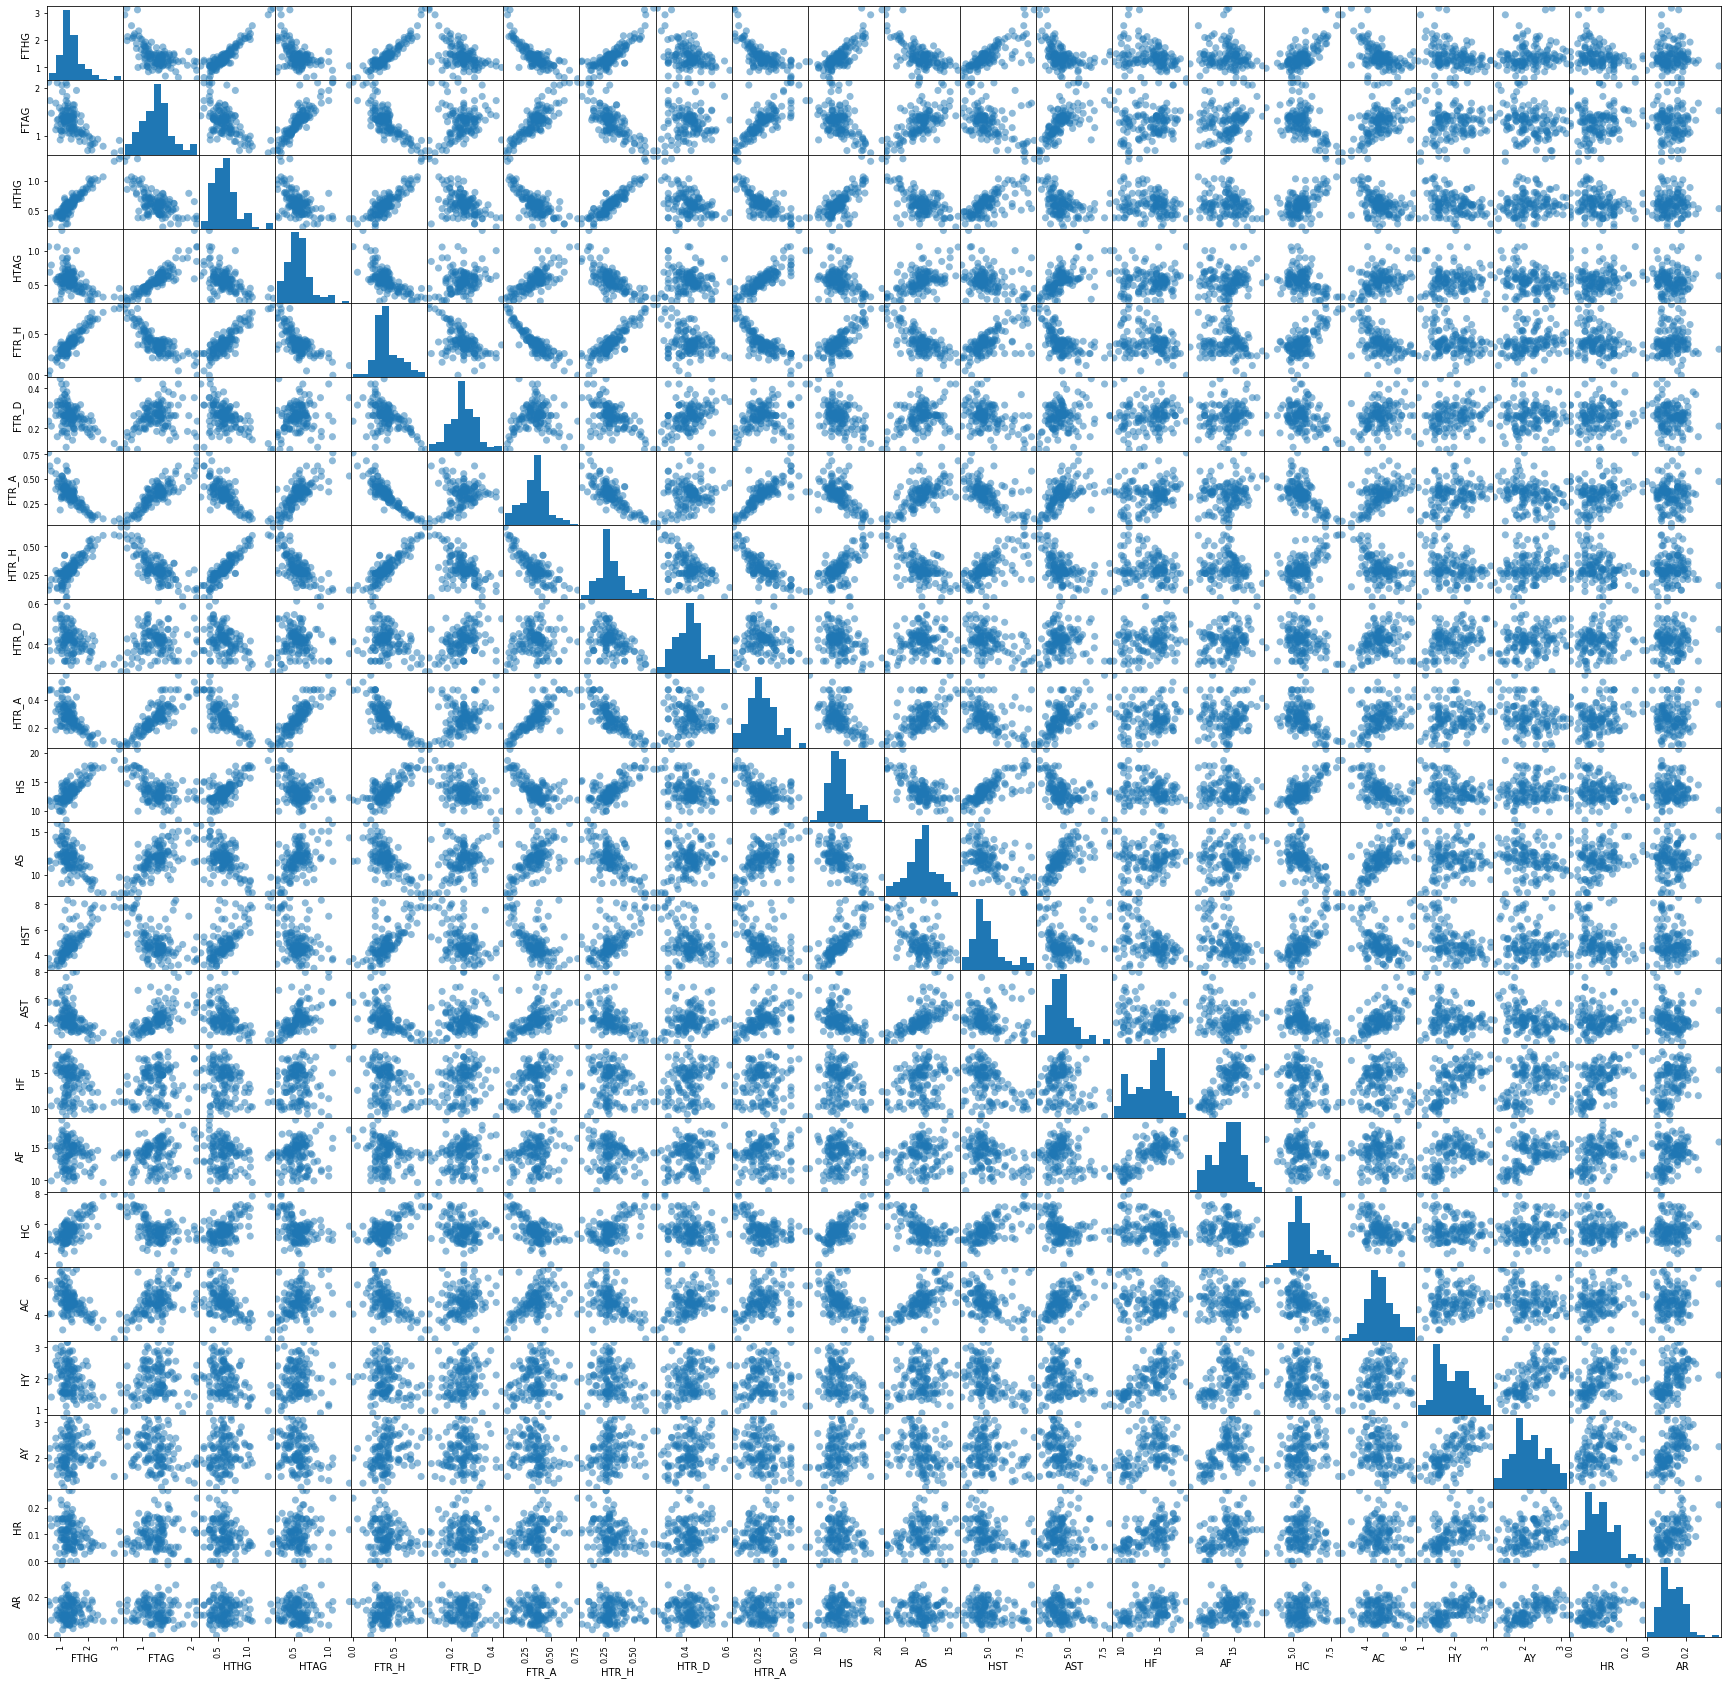

In [271]:
pd.plotting.scatter_matrix(home, figsize=(30,30), s=200);

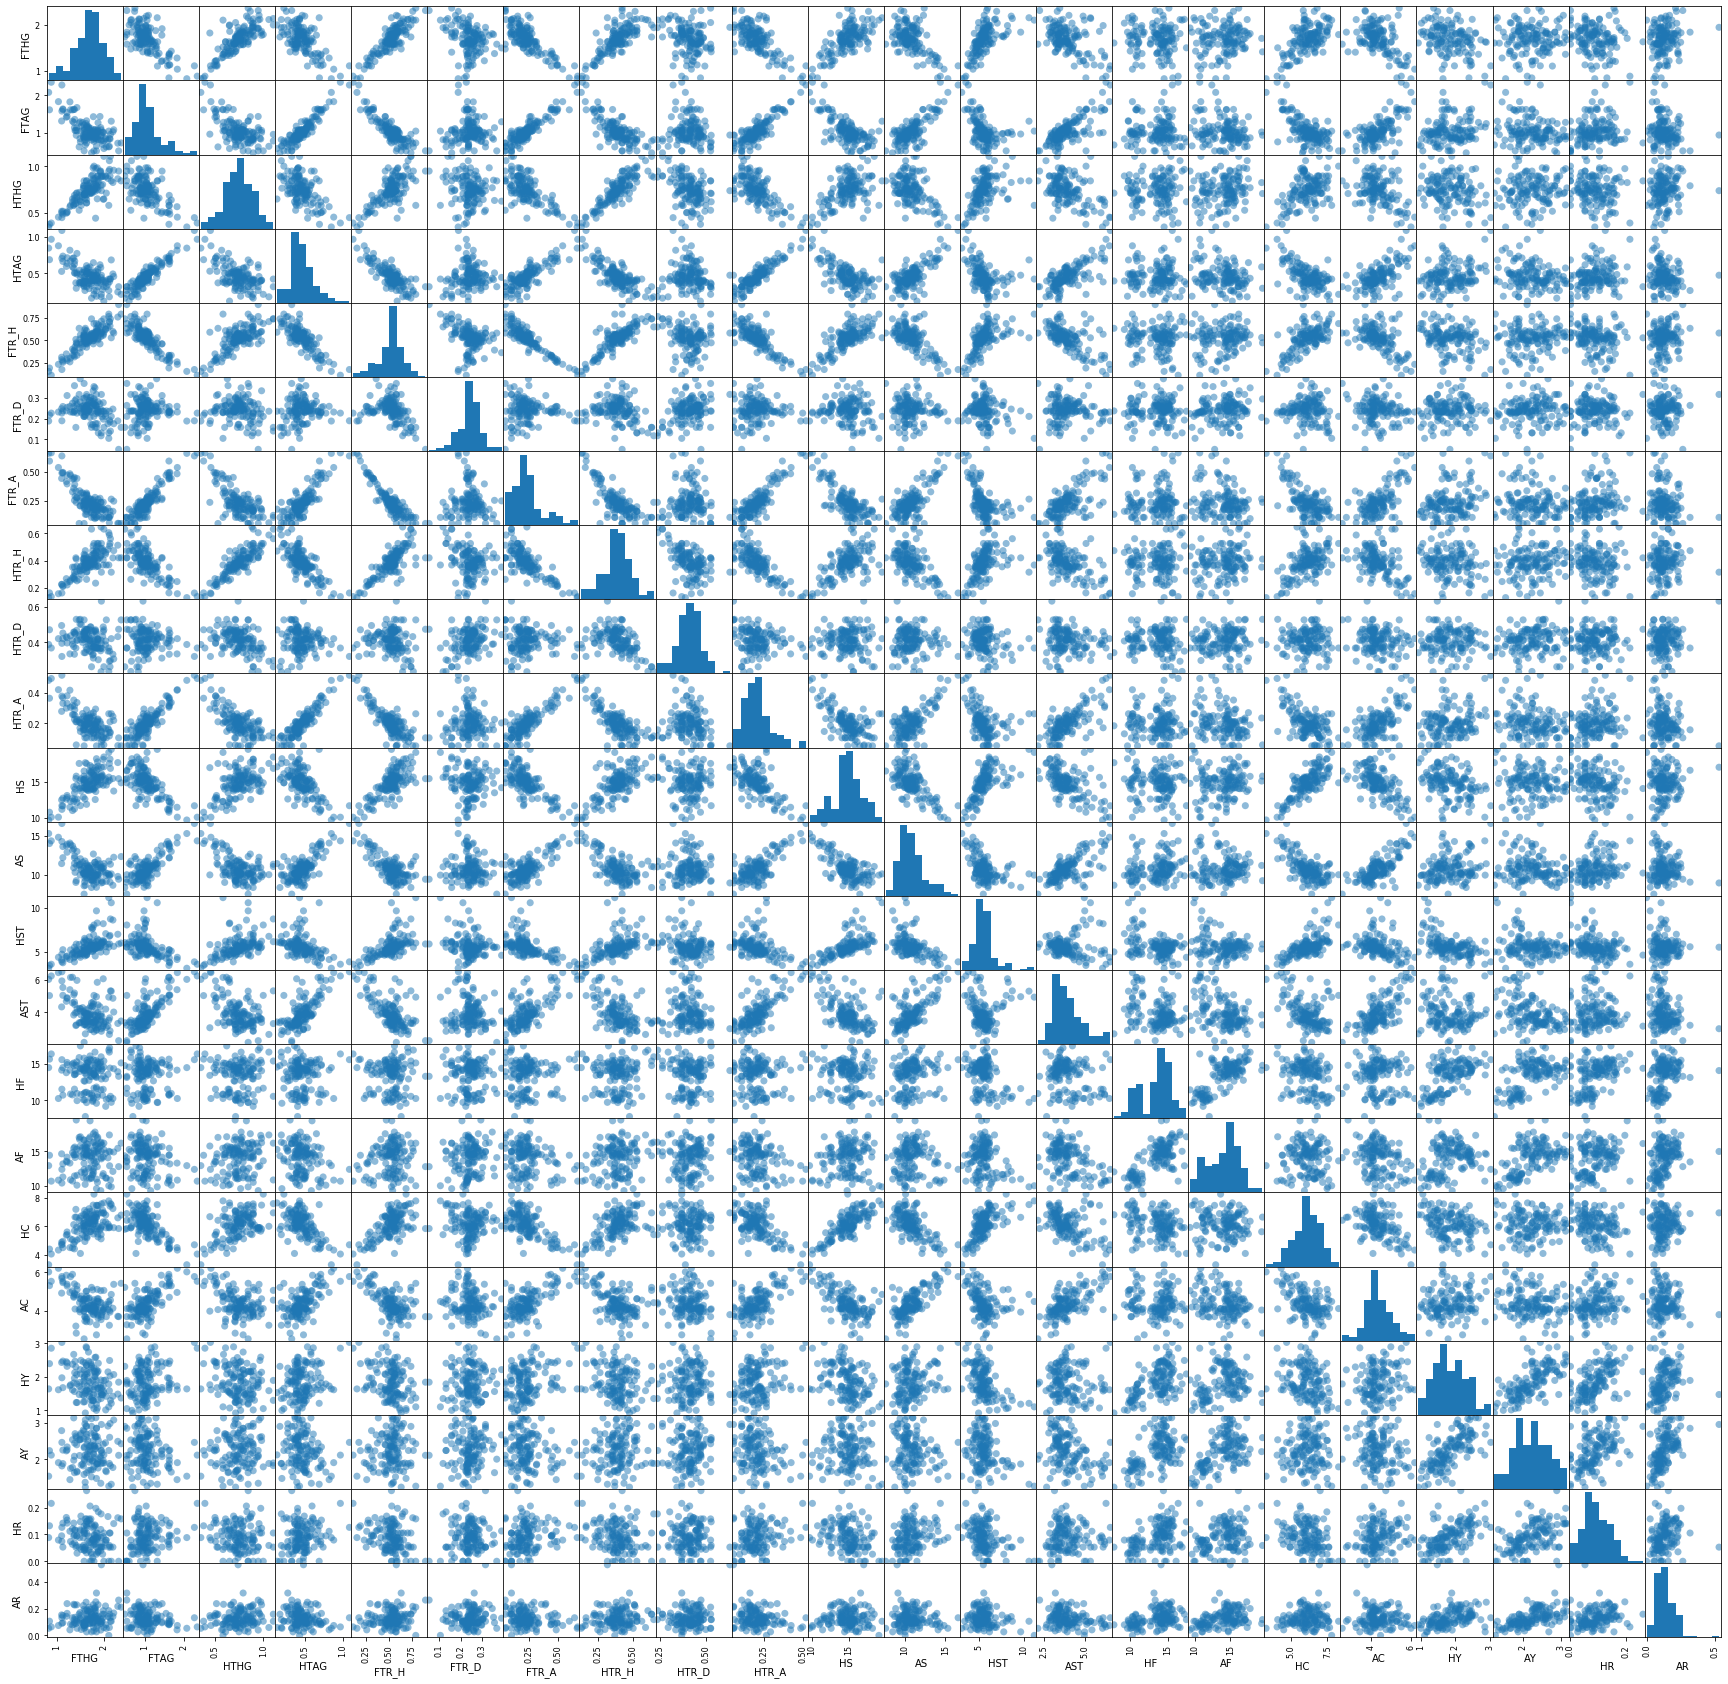

In [272]:
pd.plotting.scatter_matrix(away, figsize=(30,30), s=200);

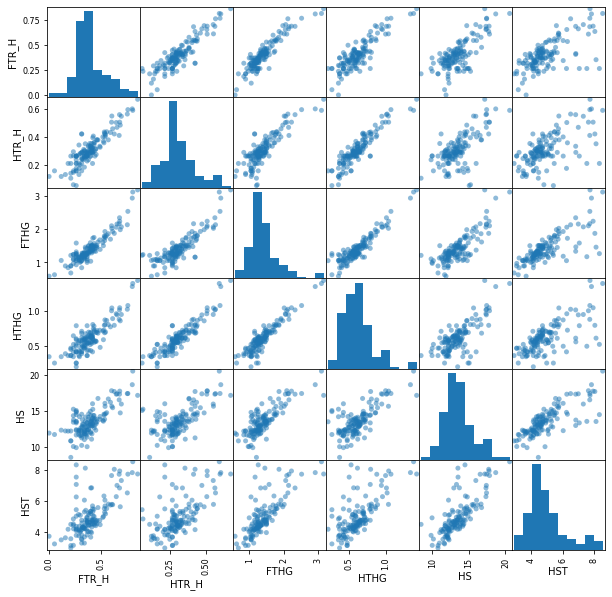

In [478]:
pd.plotting.scatter_matrix(home[['FTR_H','HTR_H','FTHG','HTHG','HS','HST']], figsize=(10,10), s=100);

## Hypothesis Test 1

### Hypothesis test: Is the probablity of the home team winning lower last season compared to the previous 9 seasons?

##### Null hypothesis: There is no difference in win percentage  for the Home Team.
##### Alternative: There is a statistically significant decrease in win percentage for the Home Team.

#### P-value = 0.05.

In [534]:
dfs0918.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13011 entries, 0 to 13010
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       13011 non-null  object        
 1   Date      13011 non-null  datetime64[ns]
 2   HomeTeam  13011 non-null  object        
 3   AwayTeam  13011 non-null  object        
 4   FTHG      13011 non-null  float64       
 5   FTAG      13011 non-null  float64       
 6   HTHG      13011 non-null  float64       
 7   HTAG      13011 non-null  float64       
 8   FTR_H     13011 non-null  uint8         
 9   FTR_D     13011 non-null  uint8         
 10  FTR_A     13011 non-null  uint8         
 11  HTR_H     13011 non-null  uint8         
 12  HTR_D     13011 non-null  uint8         
 13  HTR_A     13011 non-null  uint8         
 14  HS        13011 non-null  float64       
 15  AS        13011 non-null  float64       
 16  HST       13011 non-null  float64       
 17  AST       13

In [535]:
dfs19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       1446 non-null   object        
 1   Date      1446 non-null   datetime64[ns]
 2   HomeTeam  1446 non-null   object        
 3   AwayTeam  1446 non-null   object        
 4   FTHG      1446 non-null   float64       
 5   FTAG      1446 non-null   float64       
 6   HTHG      1446 non-null   float64       
 7   HTAG      1446 non-null   float64       
 8   FTR_H     1446 non-null   uint8         
 9   FTR_D     1446 non-null   uint8         
 10  FTR_A     1446 non-null   uint8         
 11  HTR_H     1446 non-null   uint8         
 12  HTR_D     1446 non-null   uint8         
 13  HTR_A     1446 non-null   uint8         
 14  HS        1446 non-null   float64       
 15  AS        1446 non-null   float64       
 16  HST       1446 non-null   float64       
 17  AST       1446

Last 9 Seasons - Home Win Ratio: 46.6%

In [548]:
games0918 = dfs0918.Div.count()
games0918

13011

In [538]:
len(dfs0918.HomeTeam.unique())

132

In [546]:
wins0918 = dfs0918['FTR_H'].sum()
wins0918

6058

In [551]:
loss_draw0918 = dfs0918['FTR_A'].sum() + dfs0918['FTR_D'].sum()
loss_draw0918

6953

In [553]:
wins0918 / games0918

0.46560602567058645

2019 Season - Home Win Ratio: 45.2%

In [549]:
games19 = dfs19.Div.count()
games19

1446

In [539]:
len(dfs19.HomeTeam.unique())

78

In [550]:
wins19 = dfs19['FTR_H'].sum()
wins19

653

In [552]:
loss_draw19 = dfs19['FTR_A'].sum() + dfs19['FTR_D'].sum()
loss_draw19

793

In [554]:
wins19 / games19

0.4515905947441217

Testing Binomial distribution with P-value = 0.05.

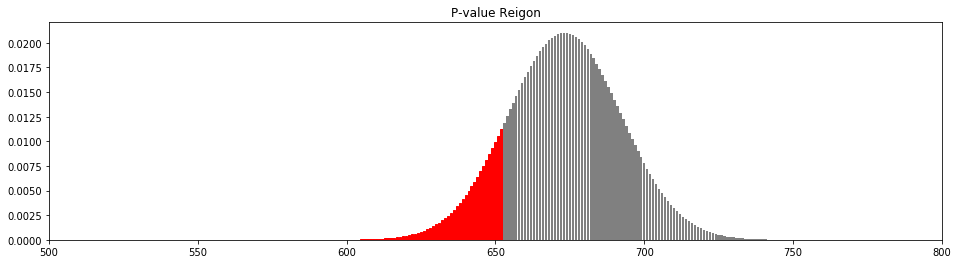

In [567]:
binomial = stats.binom(1446, 0.4656)

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(1447), 
              [binomial.pmf(i) for i in range(1447)], 
              color="grey", align="center")
ax.set_xlim(500, 800)

for i in range(1, 653):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [568]:
prob_equal_or_more_extreme = binomial.cdf(652)
print("Probability of Observing Data Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data Equal or More Extreme than Actual: 0.14


Since 

In [350]:
axs.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x131f8c890>,
      dtype=object)

In [ ]:
x 

fig, ax = plt.subplots(figsize = (12,8))


In [ ]:
x = np.linspace(0,1, 500)
fig, ax = plt.subplots(figsize = (12,8))
fig.tight_layout()